In [121]:
import pandas as pd

# Load the dataset to inspect the columns

data_quality = pd.read_excel(r'E:\IS_733\Project\Agency for Healthcare Research and Quality.csv.xlsx')
data_spending = pd.read_excel(r'E:\IS_733\Project\Medicare Spending Per Patient.csv.xlsx')



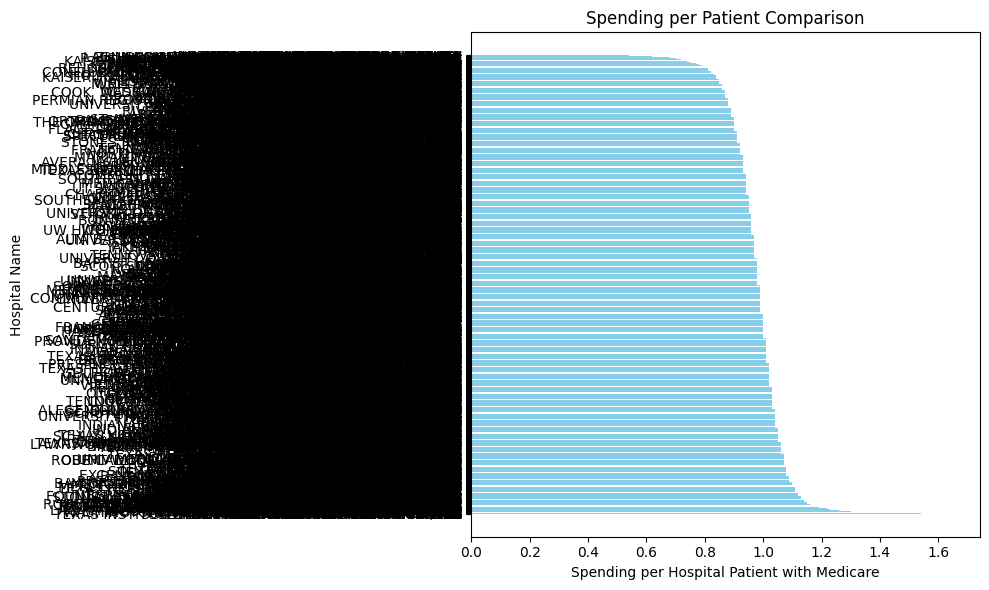

In [122]:

    # Handle numeric conversion issues in the spending dataset
    data_spending['Spending per Hospital Patient with Medicare'] = pd.to_numeric(
        data_spending['Spending per Hospital Patient with Medicare'], errors='coerce'
    )

    # Drop rows with invalid spending values
    spending_comparison = data_spending[['Hospital Name', 'Spending per Hospital Patient with Medicare']].dropna()

    # Sort spending data
    spending_comparison_sorted = spending_comparison.sort_values(by='Spending per Hospital Patient with Medicare', ascending=False)

    # Spending Visualization
    plt.figure(figsize=(10, 6))
    plt.barh(spending_comparison_sorted['Hospital Name'], spending_comparison_sorted['Spending per Hospital Patient with Medicare'], color='skyblue')
    plt.xlabel("Spending per Hospital Patient with Medicare")
    plt.ylabel("Hospital Name")
    plt.title("Spending per Patient Comparison")
    plt.tight_layout()
    plt.show()

   

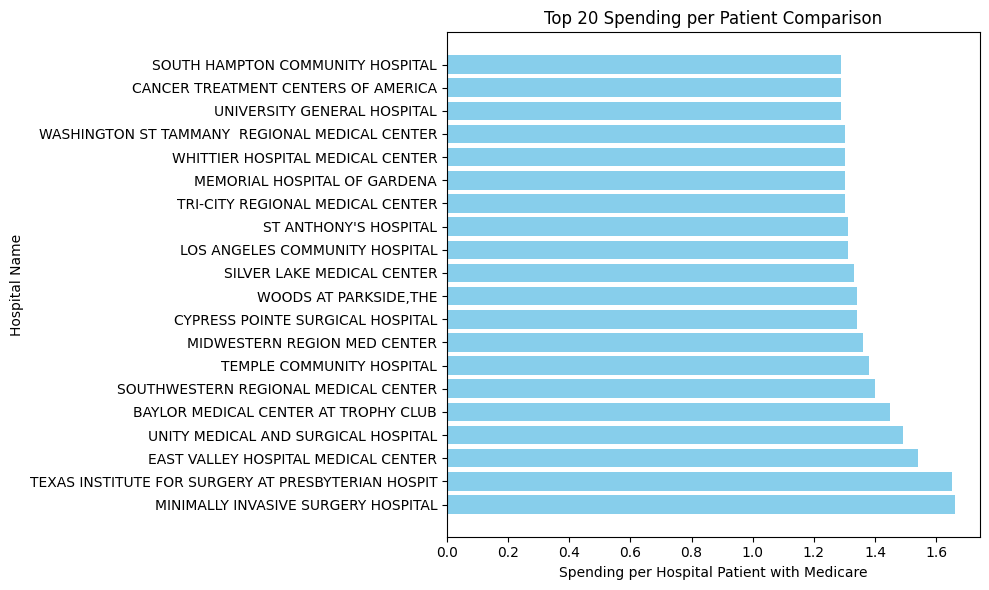

In [166]:
try:
    # Limit spending visualization to the top 20 hospitals
    spending_comparison_sorted = spending_comparison_sorted.head(20)

    # Spending Visualization (Top 20 Hospitals)
    plt.figure(figsize=(10, 6))
    plt.barh(spending_comparison_sorted['Hospital Name'], spending_comparison_sorted['Spending per Hospital Patient with Medicare'], color='skyblue')
    plt.xlabel("Spending per Hospital Patient with Medicare")
    plt.ylabel("Hospital Name")
    plt.title("Top 20 Spending per Patient Comparison")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")


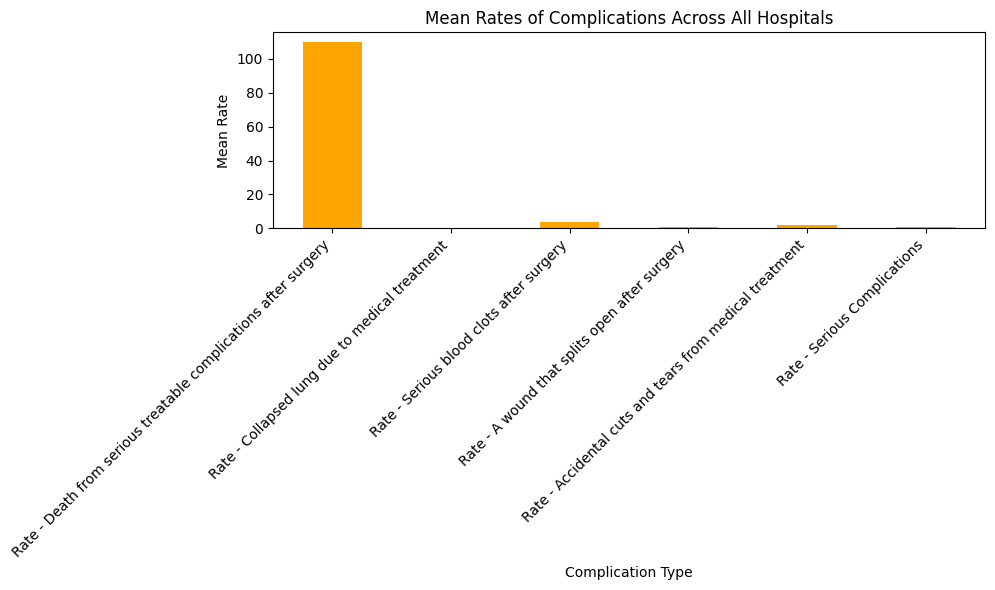

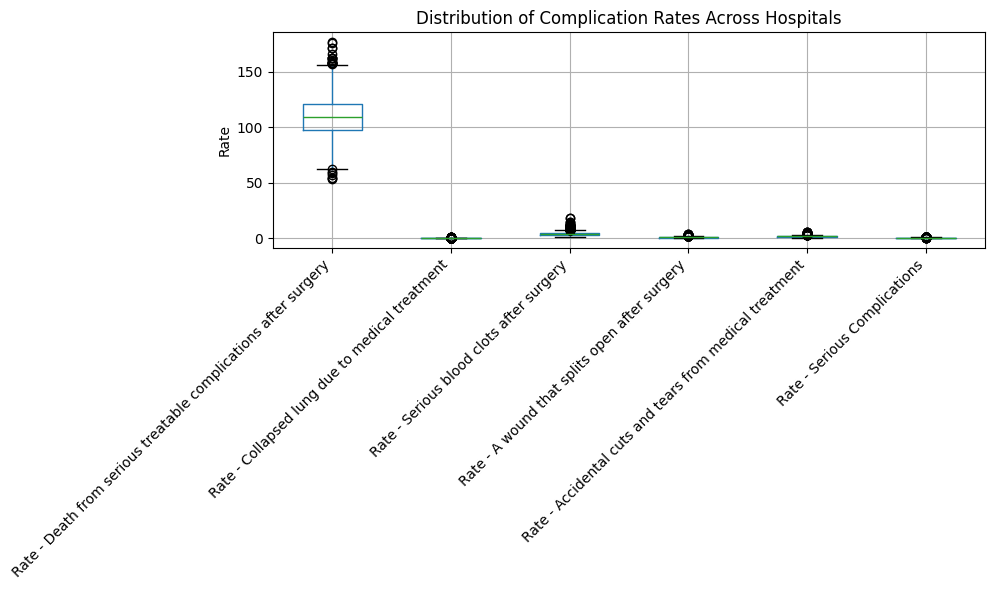

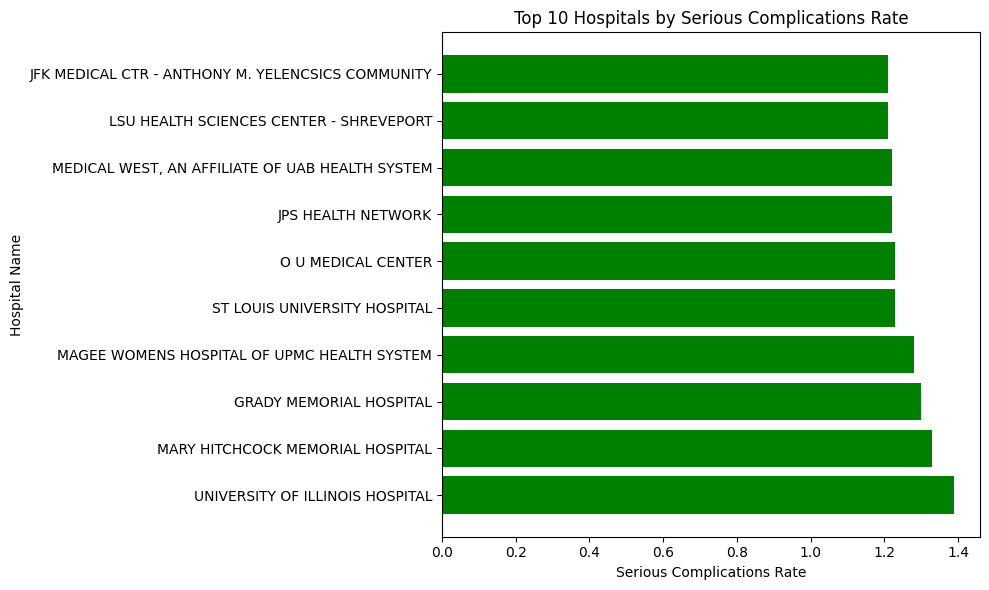

In [124]:
import pandas as pd

# Load the dataset to inspect the columns

data_quality = pd.read_excel(r'E:\IS_733\Project\Agency for Healthcare Research and Quality.csv.xlsx')
data_spending = pd.read_excel(r'E:\IS_733\Project\Medicare Spending Per Patient.csv.xlsx')



# List of complication rate columns
complication_columns = [
    'Rate - Death from serious treatable complications after surgery',
    'Rate - Collapsed lung due to medical treatment',
    'Rate - Serious blood clots after surgery',
    'Rate - A wound that splits open after surgery',
    'Rate - Accidental cuts and tears from medical treatment',
    'Rate - Serious Complications',
]

try:
    # Prepare complication rates dataset
    complication_rates = data_quality[['Hospital Name'] + complication_columns].copy()

    # Convert columns to numeric, ignoring errors
    for col in complication_columns:
        complication_rates[col] = pd.to_numeric(complication_rates[col], errors='coerce')

    # Drop rows with all NaN complication values
    complication_rates.dropna(subset=complication_columns, how='all', inplace=True)

    # Plot mean rates of complications across all hospitals
    complication_means = complication_rates[complication_columns].mean()

    plt.figure(figsize=(10, 6))
    complication_means.plot(kind='bar', color='orange')
    plt.title("Mean Rates of Complications Across All Hospitals")
    plt.xlabel("Complication Type")
    plt.ylabel("Mean Rate")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Boxplot of complication rates
    plt.figure(figsize=(10, 6))
    complication_rates[complication_columns].boxplot()
    plt.title("Distribution of Complication Rates Across Hospitals")
    plt.ylabel("Rate")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Top hospitals by "Serious Complications"
    top_serious_complications = complication_rates[['Hospital Name', 'Rate - Serious Complications']].sort_values(
        by='Rate - Serious Complications', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    plt.barh(top_serious_complications['Hospital Name'], top_serious_complications['Rate - Serious Complications'], color='green')
    plt.title("Top 10 Hospitals by Serious Complications Rate")
    plt.xlabel("Serious Complications Rate")
    plt.ylabel("Hospital Name")
    plt.tight_layout()
    plt.show()

except KeyError as ke:
    print(f"KeyError: {ke} - Check column names in your dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


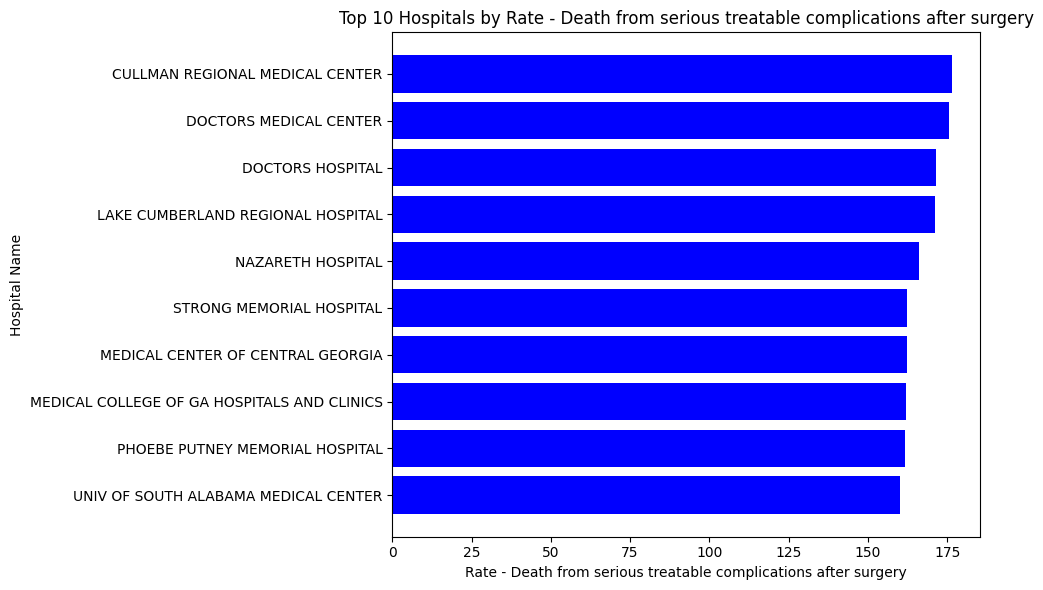

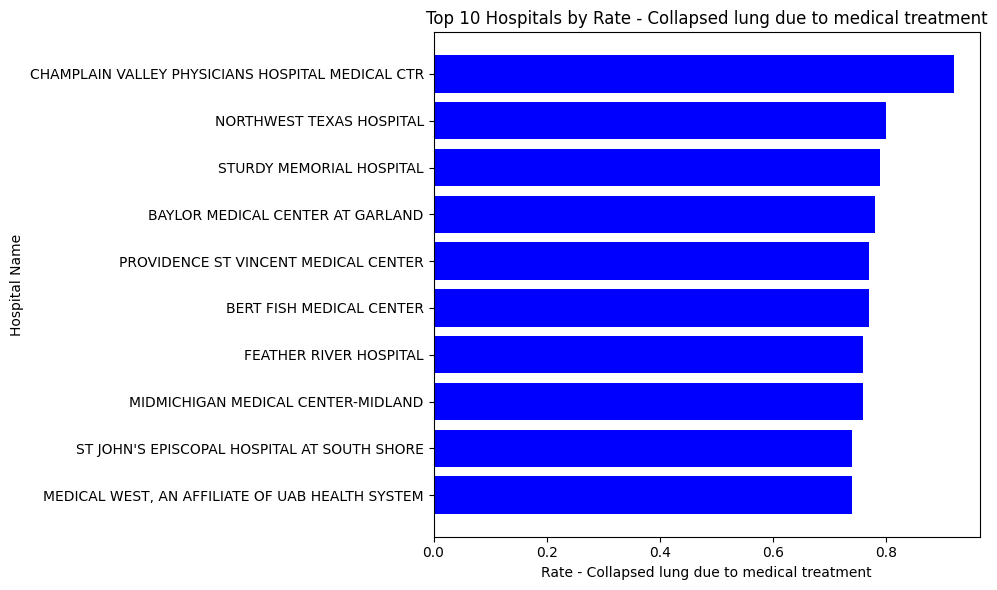

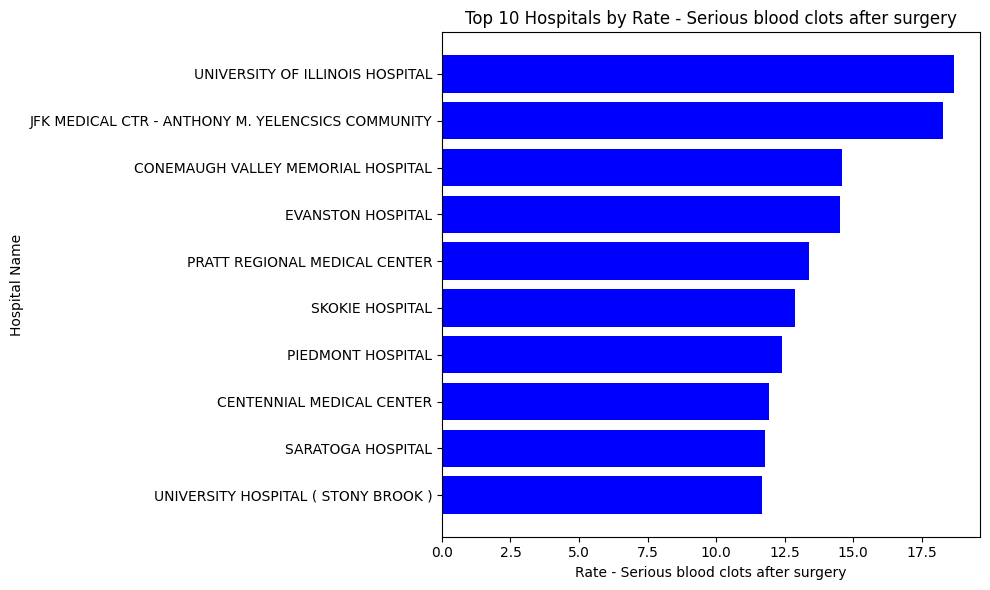

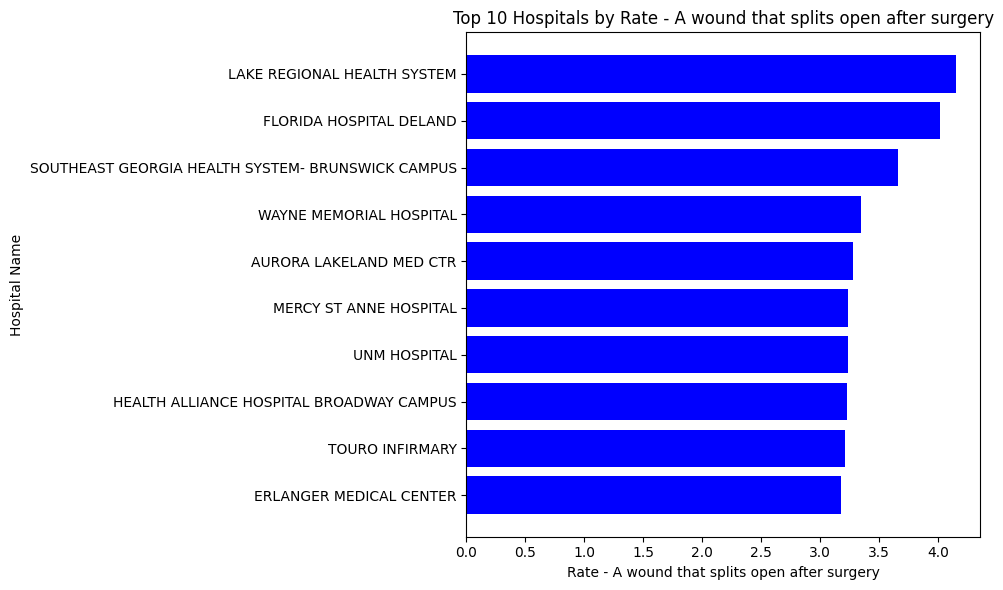

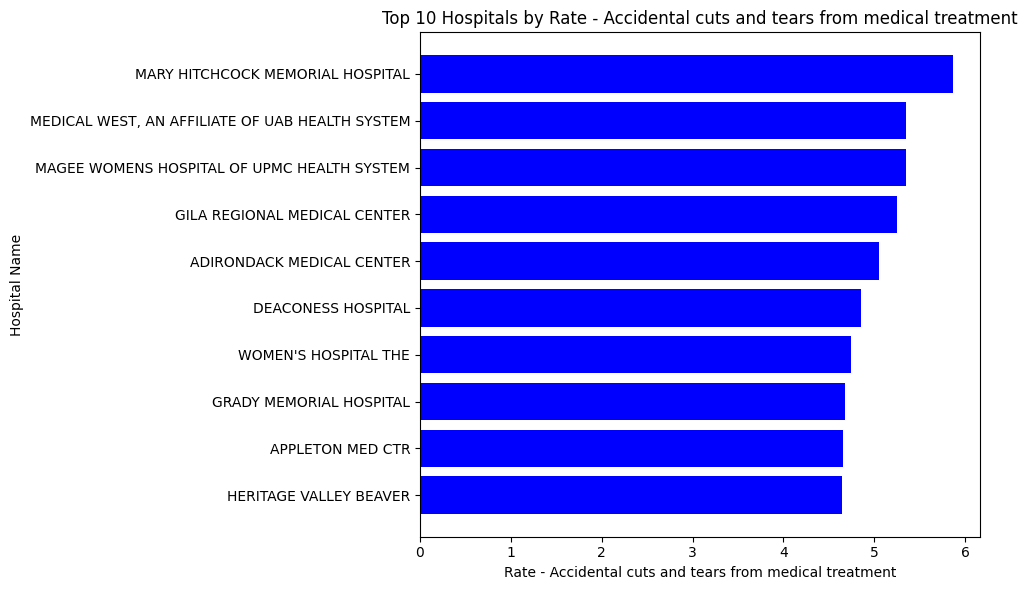

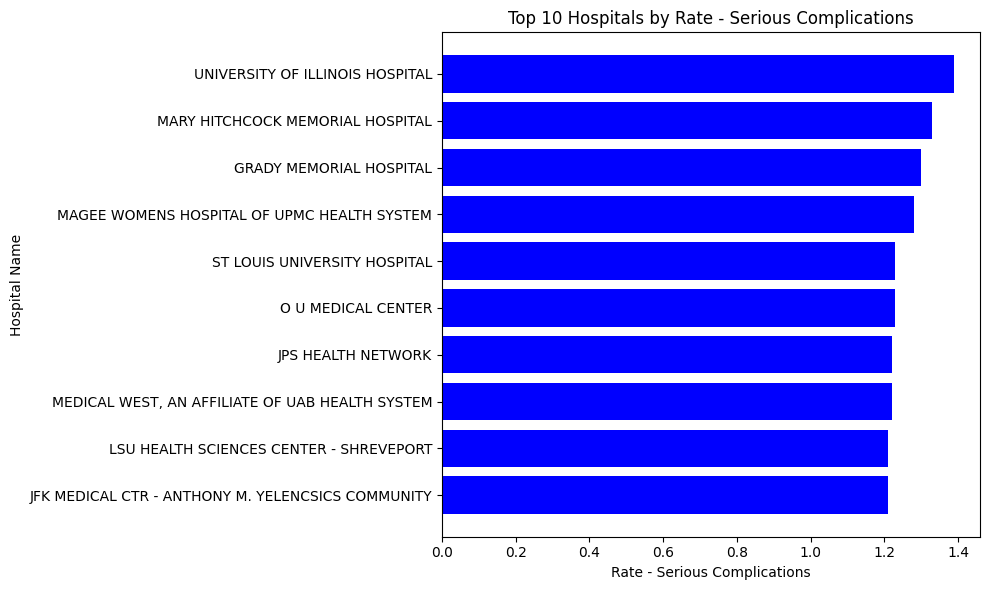

In [125]:
import matplotlib.pyplot as plt

# List of complication columns
complication_columns = [
    'Rate - Death from serious treatable complications after surgery',
    'Rate - Collapsed lung due to medical treatment',
    'Rate - Serious blood clots after surgery',
    'Rate - A wound that splits open after surgery',
    'Rate - Accidental cuts and tears from medical treatment',
    'Rate - Serious Complications'
]

# Iterate over each complication column to create a plot
for column in complication_columns:
    top_hospitals = complication_rates[['Hospital Name', column]].sort_values(
        by=column, ascending=False).head(10)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(top_hospitals['Hospital Name'], top_hospitals[column], color='blue')
    plt.title(f"Top 10 Hospitals by {column}")
    plt.xlabel(column)
    plt.ylabel("Hospital Name")
    plt.tight_layout()
    plt.gca().invert_yaxis()  # To display the highest rate at the top
    plt.show()


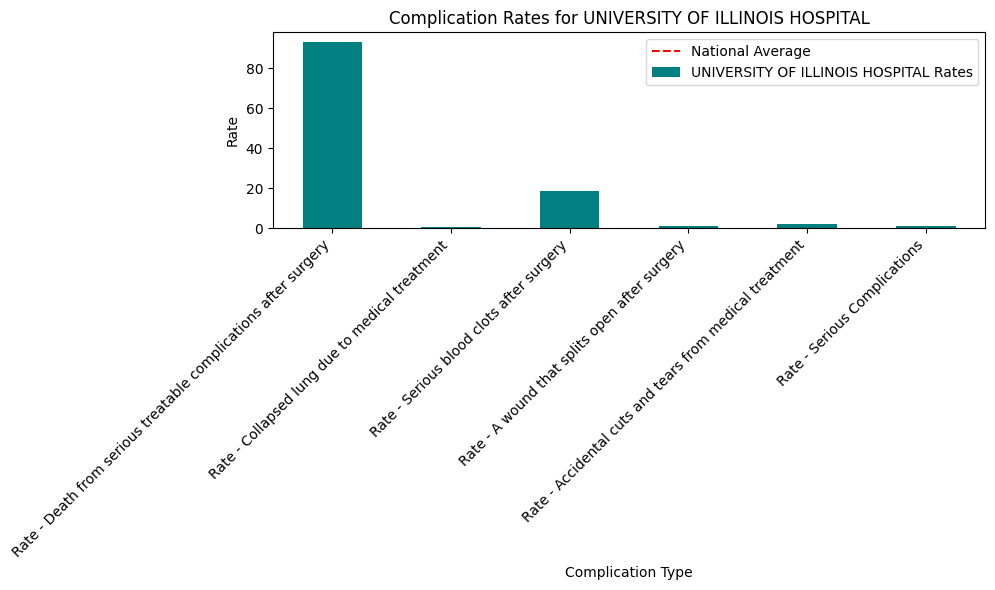

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
dataset = pd.read_excel(r'E:\IS_733\Project\Agency for Healthcare Research and Quality.csv.xlsx')

try:
    hospital_name = "UNIVERSITY OF ILLINOIS HOSPITAL"  # Example hospital name
    quality_hospital = dataset[dataset['Hospital Name'].str.contains(hospital_name, case=False, na=False)].copy()

    if not quality_hospital.empty:
        complication_columns = [
            'Rate - Death from serious treatable complications after surgery',
            'Rate - Collapsed lung due to medical treatment',
            'Rate - Serious blood clots after surgery',
            'Rate - A wound that splits open after surgery',
            'Rate - Accidental cuts and tears from medical treatment',
            'Rate - Serious Complications',
        ]

        # Ensure numeric conversion for complication columns
        for col in complication_columns:
            quality_hospital.loc[:, col] = pd.to_numeric(quality_hospital[col], errors='coerce')

        # Prepare data for visualization
        quality_comparison = quality_hospital[complication_columns].T
        quality_comparison.columns = ['Rates']

        # Calculate national average for each complication
        national_average = dataset[complication_columns].mean(numeric_only=True)

        # Plot the data
        plt.figure(figsize=(10, 6))
        ax = quality_comparison['Rates'].plot(kind='bar', color='teal', label=f"{hospital_name} Rates")

        # Plot national average as a horizontal line for each category
        plt.hlines(
            national_average.values,  # Y-coordinates (national averages)
            xmin=-0.5,                # Start of each bar
            xmax=0.5 + len(complication_columns) - 1,  # End of each bar
            colors='red',
            linestyles='--',
            label='National Average'
        )

        plt.title(f"Complication Rates for {hospital_name}")
        plt.xlabel("Complication Type")
        plt.ylabel("Rate")
        plt.xticks(range(len(complication_columns)), complication_columns, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No quality data found for {hospital_name}.")
except Exception as e:
    print(f"An error occurred: {e}")


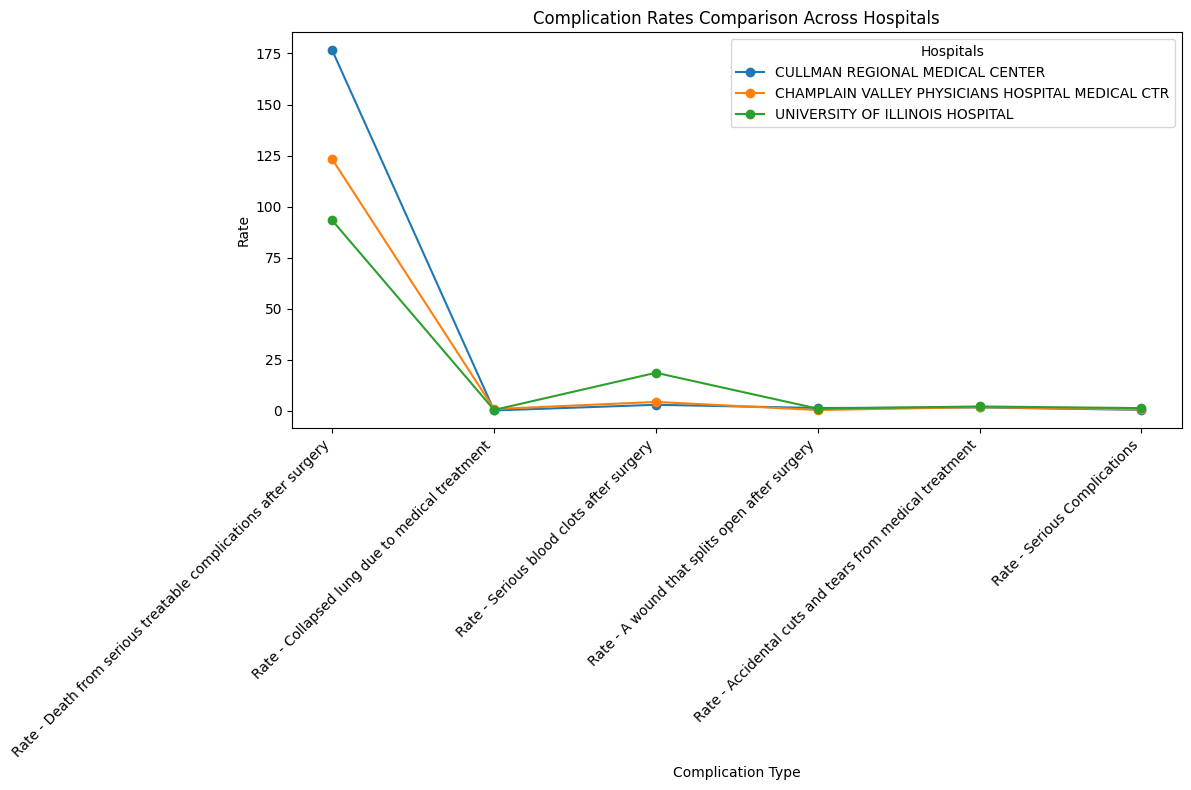

In [142]:
# # compare_hospital_complications


try:
        # Filter data for the selected hospitals
        hospital_names= "CULLMAN REGIONAL MEDICAL CENTER", "CHAMPLAIN VALLEY PHYSICIANS HOSPITAL MEDICAL CTR", "UNIVERSITY OF ILLINOIS HOSPITAL"


        filtered_data = dataset[dataset['Hospital Name'].str.contains('|'.join(hospital_names), case=False, na=False)].copy()

        if not filtered_data.empty:
            # Ensure numeric conversion for complication columns
            for col in complication_columns:
                filtered_data.loc[:, col] = pd.to_numeric(filtered_data[col], errors='coerce')

            # Prepare data for visualization
            comparison_data = filtered_data[['Hospital Name'] + complication_columns].melt(
                id_vars=['Hospital Name'], var_name='Complication', value_name='Rate')

            # Plot the data
            plt.figure(figsize=(12, 8))
            for hospital in hospital_names:
                hospital_data = comparison_data[comparison_data['Hospital Name'].str.contains(hospital, case=False, na=False)]
                plt.plot(hospital_data['Complication'], hospital_data['Rate'], marker='o', label=hospital)

            plt.title("Complication Rates Comparison Across Hospitals")
            plt.xlabel("Complication Type")
            plt.ylabel("Rate")
            plt.xticks(rotation=45, ha='right')
            plt.legend(title="Hospitals")
            plt.tight_layout()
            plt.show()
        else:
            print("No data found for the selected hospitals.")
except Exception as e:
        print(f"An error occurred: {e}")
